# Iris Flower Classification

## Project Overview 
This project is a supervised classification problem focused on Iris flower species identification. Its primary aim is to develop a machine learning model that can accurately classify Iris flowers into one of three distinct species, namely 'setosa,' 'versicolor,' and 'virginica.' The classification is based on the flowers' sepal and petal measurements, making use of a dataset containing these numerical features. The target variable, 'species,' is a categorical attribute with three exclusive classes. The project's objective is to create a robust model capable of accurately categorizing Iris flowers by leveraging their morphological characteristics

## Business Understanding

Problem Statement: The goal of this project is to develop a machine learning model that can accurately classify Iris flowers into their respective species (setosa, versicolor, and virginica) based on their sepal and petal measurements.
Relevance: Accurate classification of Iris flowers is valuable for botanists, horticulturists, and researchers studying plant species. It can also be used for educational purposes in introductory machine learning and classification tasks.

### Project Objectives:   

Primary Objective:
* Train a machine learning model to classify Iris flowers into three species based on sepal and petal measurements.

Secondary Objectives:

* Explore and analyze the Iris dataset to gain insights into the characteristics of the data.
* Preprocess the data to make it suitable for training a machine learning model.
* Select an appropriate machine learning algorithm for classification.
* Train and evaluate the model's performance using relevant metrics.
* Create a user-friendly interface for users to input sepal and petal measurements and receive species predictions.


## Data Understanding 

Data Source: The dataset used for this project is the Iris dataset obtained from Kaggle :[Iris Flower Dataset](https://www.kaggle.com/datasets/arshid/iris-flower-dataset)

Data Description: The dataset consists of the following columns:  

``sepal_length``: Sepal length in centimeters (numerical)  
``sepal_width``: Sepal width in centimeters (numerical)  
``petal_length``: Petal length in centimeters (numerical)    
``petal_width``: Petal width in centimeters (numerical)  
``species``: The target variable, indicating the Iris species (categorical - 'setosa', 'versicolor', 'virginica')  

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [35]:
class DataProcessor:
    def __init__(self, df):
        # Initialize with a DataFrame.
        self.df = df

    def get_info(self):
        # Get basic DataFrame info 
        return self.df.info()
    
    def get_summary_statistics(self):
        # Get summary statistics for numerical columns.
        return self.df.describe()
    
    def get_dtypes(self):
        # Get data types of columns.
        return self.df.dtypes
    
    def get_missing_values(self):
        # Get the count of missing (null) values in each column.
        return self.df.isnull().sum()
    def get_value_counts(self):
        # Get value counts for all categorical columns.
        categorical_columns = self.df.select_dtypes(include=['object']).columns
        value_counts = {}
        for col in categorical_columns:
            value_counts[col] = self.df[col].value_counts()
        return value_counts
    
        

In [36]:
#load the dataset
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
# Initialize the DataProcessor class
dp = DataProcessor(df)

In [38]:
# get summary of the dataframe
dp.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [39]:
# get summary statistics
dp.get_summary_statistics()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
# check the datatypes
dp.get_dtypes()

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [41]:
# value count
dp.get_value_counts()

{'species': Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: species, dtype: int64}

In [42]:
df.shape

(150, 5)

## Data Cleaning

#### Missing values

In [43]:
dp.get_missing_values()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Data set has no missing values

#### Check for duplicates

In [46]:
# check for duplicates
df.duplicated().sum()

3

#### Remove duplicates

In [47]:
# Remove duplicate rows
df = df.drop_duplicates()

### check for outliers and drop them

In [60]:
numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

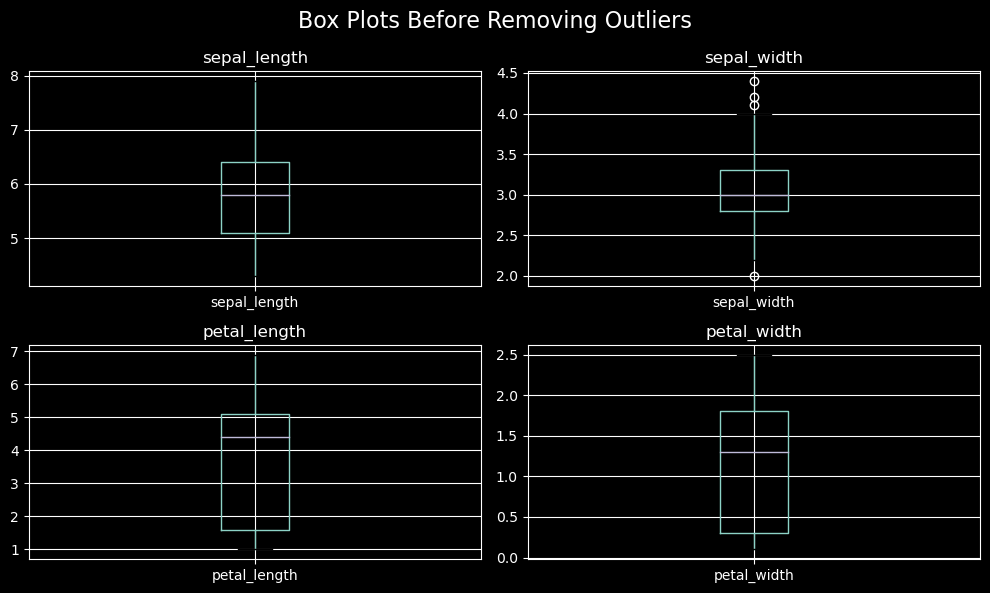

Number of rows with outliers before removal: 11


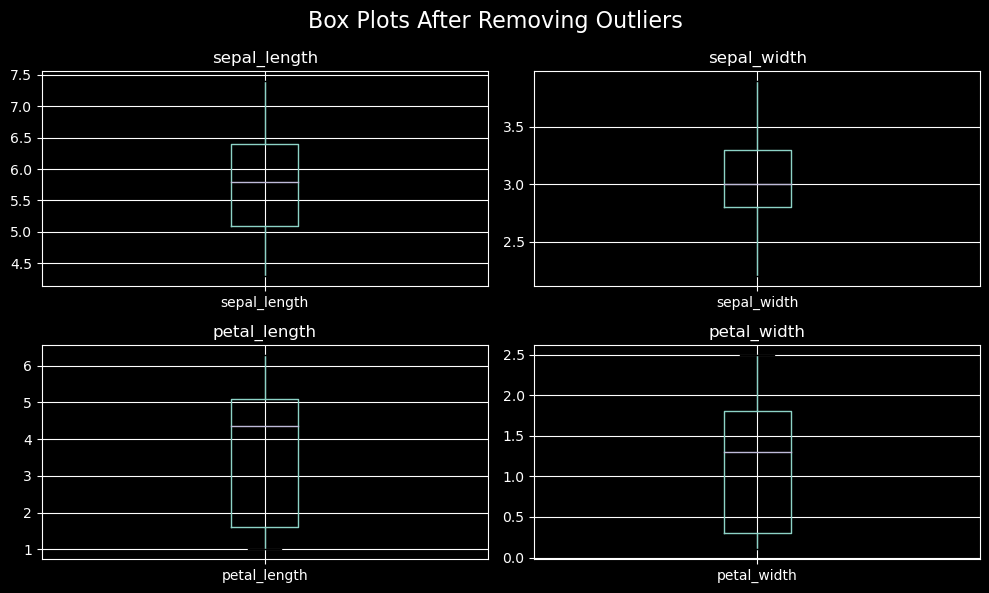

Number of rows after removing outliers: 136


In [62]:
# Set the dark_background style
plt.style.use('dark_background')

# Create box plots before removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots Before Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Calculate z-scores for numerical columns
z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = (df[column] - df[column].mean()) / df[column].std()

# Set a z-score threshold to identify outliers (e.g., 2 or -2 for a 95% confidence interval)
z_score_threshold = 2

# Identify outliers based on z-scores
outliers = z_scores[(z_scores.abs() > z_score_threshold).any(axis=1)]

# Display the number of rows with outliers before removal
print("Number of rows with outliers before removal:", len(outliers))

# Remove outliers and create a new DataFrame (df_cleaned)
df_cleaned = df[~((z_scores.abs() > z_score_threshold).any(axis=1))]

# Create box plots after removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots After Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df_cleaned.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Display the number of rows after removing outliers
print("Number of rows after removing outliers:", len(df_cleaned))


## Exploratory Data Analysis